In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils


%matplotlib inline
import matplotlib.pyplot as plt

Using Theano backend.
/Users/bsoper/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

('Shape of X_train:', (60000, 28, 28))


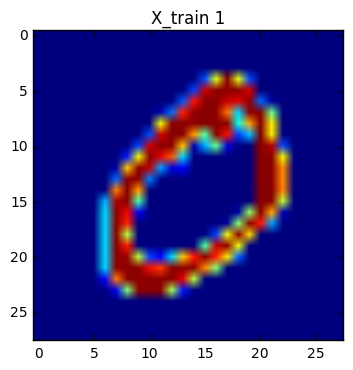

('label:', 0)


In [3]:
# show one image from the data
print('Shape of X_train:' ,X_train.shape)

plt.imshow(X_train[1,:,:])
plt.title('X_train 1')
plt.show()
print('label:', y_train[1])

In [4]:
print y_train

[5 0 4 ..., 5 6 8]


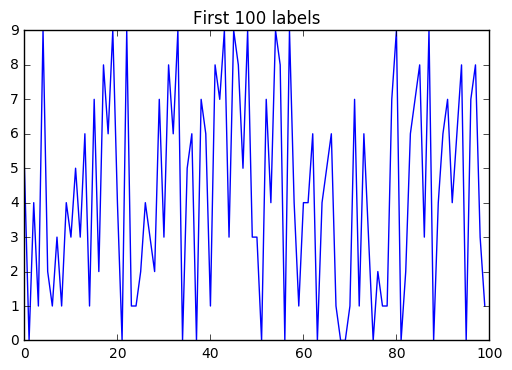

In [5]:
plt.plot(y_train[:100])
plt.title('First 100 labels')
plt.show()

In [6]:
num_train = X_train.shape[0]
num_test = X_test.shape[0]
im_width  = X_train.shape[1]
im_height = X_train.shape[2]

print('# of training samples:', num_train)
print('# of test samples:', num_test)
print('type of data:', type(X_train[1,1,1]))

# change type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print('type of data:', type(X_train[1,1,1]))

('# of training samples:', 60000)
('# of test samples:', 10000)
('type of data:', <type 'numpy.uint8'>)
('type of data:', <type 'numpy.float32'>)


In [7]:
# vectorize the images
X_train = X_train.reshape(num_train, im_width*im_height)
X_test = X_test.reshape(num_test, im_width*im_height)

In [8]:
# normalize the range
print('maximum of X_train:',np.max(X_train[:]))
X_train /= 255;
X_test /= 255;
print('maximum of X_train:',np.max(X_train[:]))

('maximum of X_train:', 255.0)
('maximum of X_train:', 1.0)


In [9]:
# convert class vectors to binary class matrices (one hot representation)
nb_classes = np.unique(y_train).size
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [10]:
# construct the network
model = Sequential()
model.add(Dense(100, input_shape=(im_width*im_height,)))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 100)           78500       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 100)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 100)           10100       activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 100)           0           dense_2[0][0]                    
___________________________________________________________________________________________

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [16]:
batch_size = 128
nb_epoch = 2
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1s - loss: 0.0408 - acc: 0.9876 - val_loss: 0.0804 - val_acc: 0.9751
Epoch 2/2
60000/60000 [==============================] - 1s - loss: 0.0345 - acc: 0.9890 - val_loss: 0.0784 - val_acc: 0.9774


In [17]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.078380556443671229)
('Test accuracy:', 0.97740000000000005)


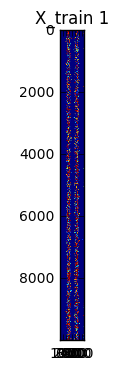

In [32]:
plt.imshow(X_test)
plt.title('X_train 1')
plt.show()

In [33]:
print model.predict(X_train)[1]

[  9.99999642e-01   1.04991298e-12   3.13380525e-07   9.92216864e-10
   1.39403734e-12   5.32417999e-10   7.66839439e-11   1.65166869e-09
   1.20946739e-10   3.05018801e-08]


In [34]:
print X_train[1]

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [37]:
print Y_train

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [36]:
print Y_test

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
